# Sampling Distributions Dance Party!

Get your dancing shoes ready! You are a DJ trying to make sure you are ready for a big party. You don’t have time to go through all the songs you can work with. Instead, you want to make sure that any sample of 30 songs from your playlist will get the party started. To do this, you will use the power of sampling distributions!

The used Dataset can be found [here](https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [26]:
# Helper Functions

def choose_statistic(x, sample_stat_text):
    # calculate mean if the text is "Mean"
    if sample_stat_text == "Mean":
        return np.mean(x)
    # calculate minimum if the text is "Minimum"
    elif sample_stat_text == "Minimum":
        return np.min(x)
    # calculate variance if the text is "Variance"
    elif sample_stat_text == "Variance":
        return np.var(x, ddof=1)
    # if you want to add an extra stat
    elif sample_stat_text == "Median":
        return np.median(x)
    elif sample_stat_text == "Maximum":
        return np.max(x)
    elif sample_stat_text == "Mode":
        return stats.mode(x)
    # raise error if sample_stat_text is not "Mean", "Minimum", or "Variance"
    else:
        raise Exception('Make sure to input "Mean", "Minimum", or "Variance"')
    

def population_distribution(population_data):
    # plot the population distribution
    sns.histplot(population_data, stat='density')
    # informative title for the distribution 
    plt.title(f"Population Distribution")
    # remove None label
    plt.xlabel('')
    plt.show()


def sampling_distribution(population_data, samp_size, stat):
    # list that will hold all the sample statistics
    sample_stats = []
    for i in range(500):
        # get a random sample from the population of size samp_size
        samp = np.random.choice(population_data, samp_size, replace = False)
        # calculate the chosen statistic (mean, minimum, or variance) of the sample
        sample_stat = choose_statistic(samp, stat)
        # add sample_stat to the sample_stats list
        sample_stats.append(sample_stat)
    
    pop_statistic = round(choose_statistic(population_data, stat),2)
    # plot the sampling distribution
    sns.histplot(sample_stats, stat='density')
    # informative title for the sampling distribution
    plt.title(f"Sampling Distribution of the {stat} \nMean of the Sample {stat}s: {round(np.mean(sample_stats), 2)} \n Population {stat}: {pop_statistic}")
    plt.axvline(pop_statistic,color='g',linestyle='dashed', label=f'Population {stat}')
    # plot the mean of the chosen sample statistic for the sampling distribution
    plt.axvline(np.mean(sample_stats),color='orange',linestyle='dashed', label=f'Mean of the Sample {stat}s')
    plt.legend()
    plt.show()

#### 1.

You will be working with a dataset called **spotify_data.csv**. Use the `read_csv()` pandas function to load in **spotify_data.csv** into a variable called `spotify_data`.

In [3]:
spotify_data = pd.read_csv('spotify_data.csv')

#### 2.

Use the pandas `.head()` function to preview the `spotify_data`. If you need a reminder of how to use this function, click the hint below.

In [4]:
spotify_data.head()

,tempo,danceability,energy,instrumentalness,liveness,valence
0,156.985,0.831,0.814,0.013400,0.0556,0.3890
1,115.080,0.719,0.493,0.000000,0.1180,0.1240
2,218.050,0.850,0.893,0.000004,0.3720,0.0391
3,186.948,0.476,0.781,0.000000,0.1140,0.1750
4,147.988,0.798,0.624,0.000000,0.1660,0.5910


#### 3.

For this project, we are going to focus on the `tempo` variable. This column gives the beats per minute (bpm) of each song in **spotify.csv**. The other columns in our dataset are:

- `danceability`
- `energy`
- `instrumentalness`
- `liveness`
- `valences`

For now, we are going to ignore these other columns.

Create a variable called `song_tempos` that contains the `tempo` column data.

In [5]:
song_tempos = spotify_data['tempo']

#### 4.

Let’s investigate the helper functions we will use in the following sections. It contains three functions: `choose_statistic()`, `population_distribution()`, and `sampling_distribution()`. The code in these functions is similar to what we saw in the previous lesson, but let’s explore these together.

- `choose_statistic()` allows us to choose a statistic we want to calculate for our sampling and population distributions. It contains two parameters:
    - `x`: An array of numbers
    - `sample_stat_text`: A string that tells the function which statistic to calculate on x. It takes on three values: “Mean”, “Minimum”, or “Variance”.

- `population_distribution()` allows us to plot the population distribution of a dataframe with one function call. It takes the following parameter:
    - `population_data`: the dataframe being passed into the function

- `sampling_distribution()` allows us to plot a simulated sampling distribution of a statistic. The simulated sampling distribution is created by taking random samples of some size, calculating a particular statistic, and plotting a histogram of those sample statistics. It contains three parameters:
    - `population_data`: the dataframe being sampled from
    - `samp_size`: the size of each sample
    - `stat`: the specific statistic being measured for each sample — either “Mean”, “Minimum”, or “Variance”

Read through these functions to familiarize yourself with them. Click the hint to see examples of `population_distribution()` and `sampling_distribution()` being used.

#### 5.

Now that our data is loaded and we have gone over the functions let’s start our sampling distributions exploration.

To start off, let’s use the `population_distribution()` function to graph distribution of `song_tempos`.

When you click run, you should see a graph with the following title:

```python
Population Distribution
```

How would you describe this distribution?

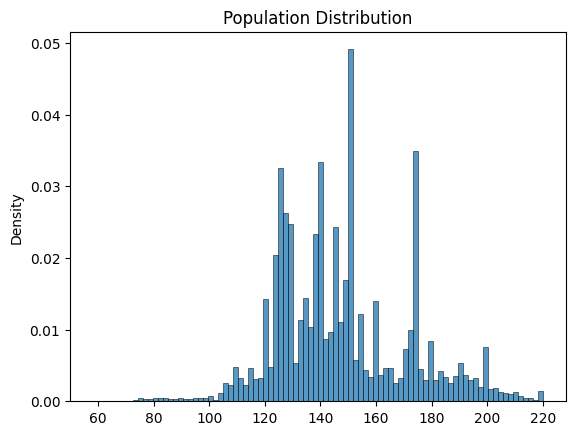

In [6]:
population_distribution(song_tempos)

The population distribution is approximately normal with a little bit of right-skewness.

#### 6.

Now let’s plot the sampling distribution of the sample mean with sample sizes of 30 songs. To do this, use the `sampling_distribution()` helper function.

Once you hit run, you should see a graph with the following title:

```python
Sampling Distribution of the Mean
Mean of the Sample Means: {Mean of the Sample Means} 
Population Mean: {Population Mean}
```

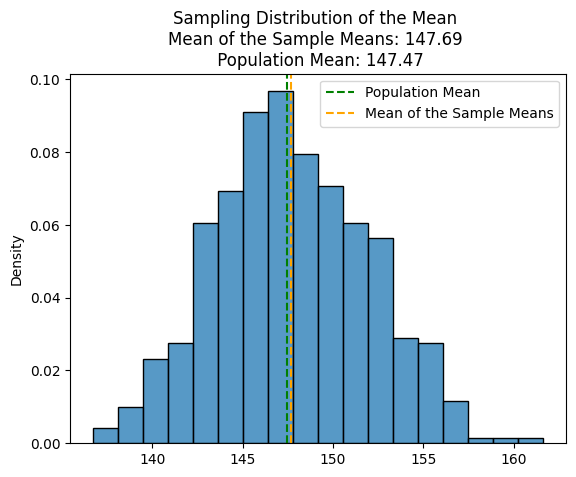

In [11]:
sampling_distribution(song_tempos, 30, "Mean")

#### 7.

Compare your sampling distribution of the sample means to the population mean. Is the sample mean an unbiased or biased estimator of the population?

In [12]:
# Its a unbiased estimator because the mean of the sampling distribution is equal to the population mean

#### 8.

Now let’s plot the sampling distribution of the sample minimum with sample sizes of 30 songs. To do this, use the `sampling_distribution()` helper function.

Once you hit run, you should see a graph with the following title:

```python
Sampling Distribution of the Minimum
Mean of the Sample Minimums: {Mean of the Sample Minimums}
Population Minimum: {Population Minimum}
```

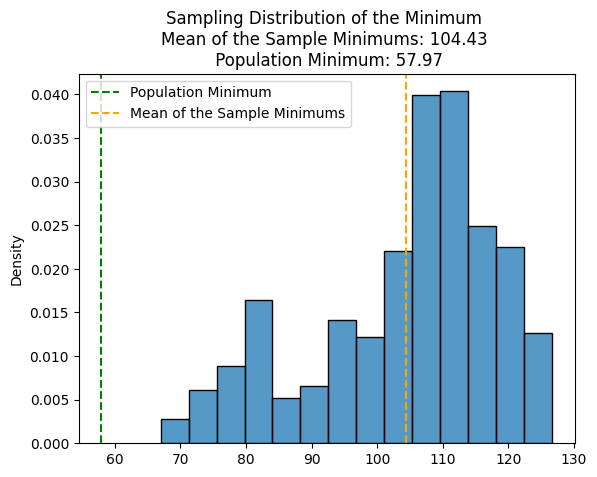

In [13]:
sampling_distribution(song_tempos, 30, "Minimum")

#### 9.

Compare your sampling distribution of the sample minimums to the population minimum. Is the sample minimum an unbiased or biased estimator of the population?

In [16]:
# Notice that the mean of the sample minimums is consistently much higher than the population minimum. 
# Since you are looking for high-tempo songs for the party, this is actually a good thing! You will want to avoid having a lot of low-tempo songs.

#### 10.

Now let’s plot the sampling distribution of the sample variance with sample sizes of 30 songs. To do this, use the `sampling_distribution()` helper function.

Once you hit run, you should see a graph with the following title:

```python
Sampling Distribution of the Variance
Mean of the Sample Variances: {Mean of the Sample Variances}
Population Variance: {Population Variance}
```

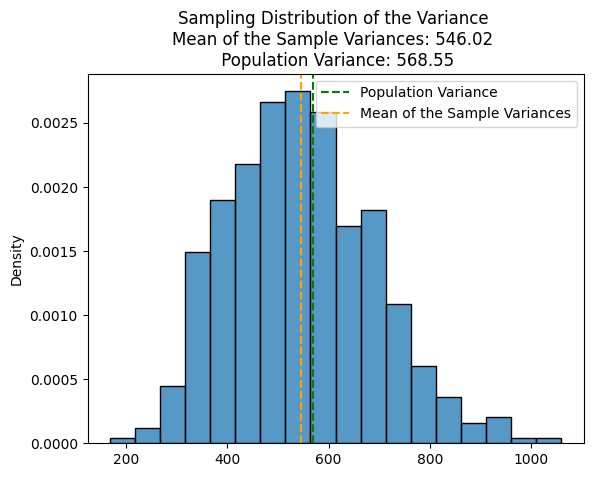

In [17]:
sampling_distribution(song_tempos, 30, "Variance")

#### 11.

Compare your sampling distribution of the sample variance to the population variance. Does the sample variance appear to be an unbiased or biased estimator of the population?

The mean of the sample variances is consistently slightly less than the population variance, meaning it is a biased estimator. However, it is super close. Let’s dig into this.

We calculated the sample variance the same way we calculate population variance..

However, the formulas for sample variance and population variance are actually distinct. As we have seen, population variance is calculated as:

$$ \text{population variance} = \frac{\sum (\text{observation} - \mu)^2}{n} $$

When we measure the sample variance using the same formula, it turns out that we tend to underestimate the population variance. Because of this, we divide by *n-1* instead of *n*:

$$ \text{sample variance} = \frac{\sum (\text{observation} - \mu)^2}{n-1} $$

Using this formula, sample variance becomes an unbiased estimator of the population variance. Let’s apply this in the next task!

#### 12.

Go to `choose_statistic()` function. You should see the following line of code:

```python
np.var(x)
```

Change this to:

```python
np.var(x, ddof=1)
```

Adding this `ddof=1` parameter will divide our input by *n-1* instead of *n*, therefore applying the sample variance formula.

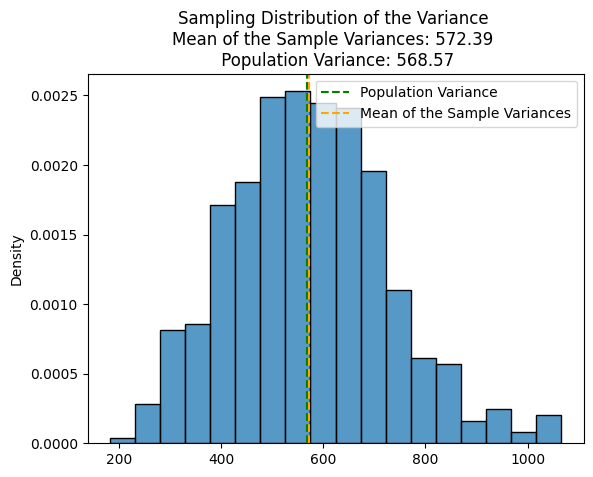

In [ ]:
# after changing from np.var(x) to np.var(x, ddof=1), all other results in previous cells are with np.var(x)
# The next cells will be with np.var(x, ddof=1)
sampling_distribution(song_tempos, 30, "Variance")  

#### 13.

We have a good sense of some sample statistics now that we’ve investigated sampling distributions. Let’s take our analysis further by calculating probabilities.

First, calculate the population mean and population standard deviation of `song_tempos`. Save these values in two separate variables called `population_mean` and `population_std`.

In [22]:
population_mean = np.mean(song_tempos)
population_std = np.std(song_tempos)

population_mean, population_std

(np.float64(147.4740559035575), np.float64(23.84434149567985))

#### 14.

Use `population_mean` and `population_std` to calculate the standard error of the sampling distribution of the sample mean with a sample size of 30.

Save this value in a variable called `standard_error`.

Reminder:

$$ \text{standard error} = \frac{\text{population standard deviation}}{\sqrt{\text{sample size}}} $$

In [23]:
standard_error = population_std / np.sqrt(30)

standard_error

np.float64(4.3533612353467745)

#### 15.

You are afraid that if the average tempo of the songs you randomly select is less than 140bpm that your party will not be enjoyable.

Using `population_mean` and `standard_error` in a CDF, calculate the probability that the sample mean of 30 selected songs is less than 140bpm.

Remember to print your result into the output terminal.

In [24]:
stats.norm.cdf(140, population_mean, standard_error)

np.float64(0.043003550159587636)

#### 16.

You know the party will be truly epic if the randomly sampled songs have an average tempo of greater than 150bpm.

Using `population_mean` and `standard_error` in a CDF, calculate the probability that the sample mean of 30 selected songs is GREATER than 150bpm.

Remember to print your result into the output terminal.

Does this probability make you feel confident about the party?

In [25]:
1 - stats.norm.cdf(150, population_mean, standard_error)

np.float64(0.2808802810182194)

#### 17.

Awesome job! You are ready to throw an awesome party! If you want to do some more exploration of sampling distributions, here are some more opportunities:
- Add another sample statistic to the `choose_statistic()` function — such as median, mode, or maximum.
- Explore a different column of data from the **spotify_data.csv** dataset.
- Use the sampling distribution of the sample minimum to estimate the probability of observing a specific sample minimum. For example, from the plot, what is the chance of getting a sample minimum that is less than 130bpm?
